In [1]:
# Some configurations to "beautify" plots
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["font.family"] = "Libre Franklin"
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["savefig.facecolor"] = "white"

# "What went wrong?" data acquisition edition
You have your hypotheses.
You've planned your study design.
It's time to acquire your data.

But first, it's important to develop a *standard operating procedure* for your acquisition.
This will not only make sure that you run things consistently, but also it will minimise experimenter effects 
in your experiments by having agreed upon, well-defined criteria for the success of your acquisition.

Such criteria could include the quality metrics generated by `MRIQC`, which are objective measurements
that can be used for defining quality cut offs.

Let's go through some examples where the images acquired have not met such criteria.

## Example 1
Let's start off with an easy one: below is a MP2RAGE structural image which was acquired with a 2x2 
surface coil.

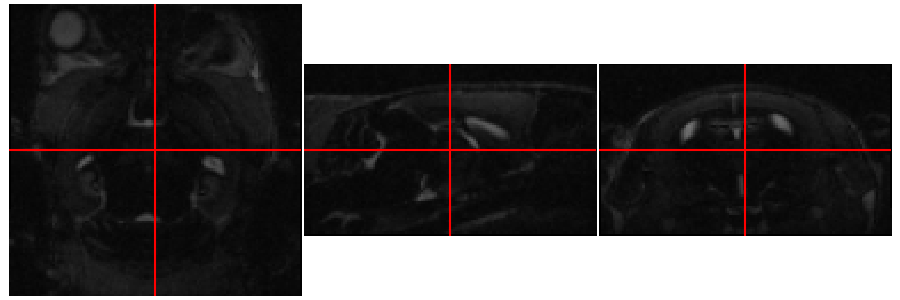

In [2]:
import nanslice.jupyter as ns
%matplotlib widget

ns.three_plane('assets/example-1_part-Mg_acq.nii.gz', interactive=True, cmap='gray', clim=(0,10))

```{hint}
:class: dropdown
Try looking at the individual coil elements in the file below.
```

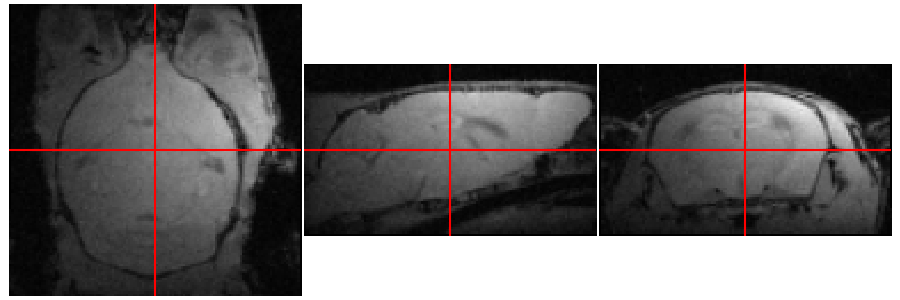

In [3]:
ns.three_plane('assets/example-1_inv-2_desc-elements_acq.nii.gz', interactive=True, clim=(0,7))

```{admonition} What do you think the problem was?
:class: dropdown
One of the four coil elements in the surface coil was broken, causing signal drop out in the area
closest to that element.

Make sure that hardware and software are tested regularly for issues.
Many scanners receive regular maintenance so it might be worth asking about the schedule at your facility.
```

## Example 2
Next, we have this example of an EPI dataset.

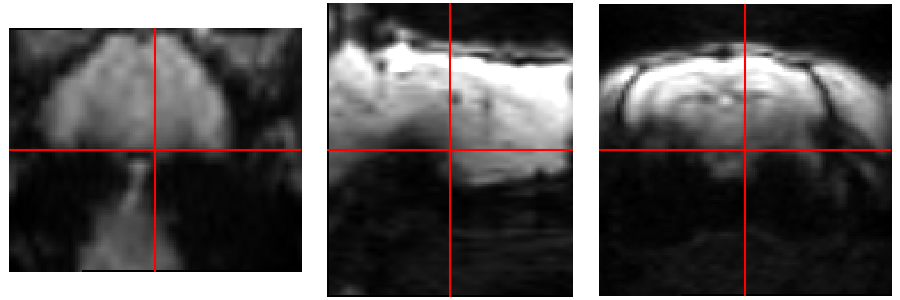

In [4]:
ns.three_plane('assets/example-2_acq.nii.gz', interactive=True, cmap='gray')

```{admonition} What do you think the problem was?
:class: dropdown
This is a ghosting artifact caused by the scan protocol.

This particular protocol was acquiring too many slices in too short a window.
If you are testing a new scan protocol, always have an optimised version before you start acquiring the data for a study.

A walk-through acquisition the day before the study starts is highly recommended if it can be budgeted for (in time and money).
```

## Example 3
Below is the first attempt at a structural image of a subject

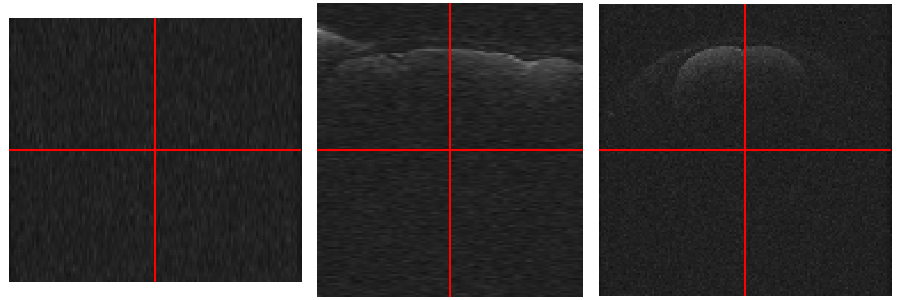

In [5]:
ns.three_plane('./assets/example-3_run-01_acq.nii.gz', interactive=True, cmap='gray', clim=(0,5))

Next, let's look at the structural image, *with the same scan parameters*, that was used for processing:

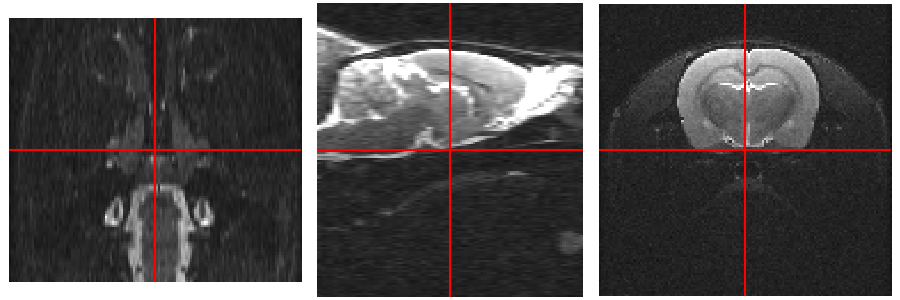

In [6]:
ns.three_plane('assets/example-3_run-03_acq.nii.gz', interactive=True, cmap='gray', clim=(0,5))

```{admonition} What is the difference between the two images??
:class: dropdown
There was a problem setting the reference power.

Scanners often run many set up steps before the acquisition takes place. 
In this case, errors had occurred during the localiser that occurred before this acquisition, but the scan proceeded regardless.
For the second image, a new set of checks were successfully applied first.

Problems in the scanner can easily escalate, so always make sure that all checks and settings are applied before proceeding.
```

## Example 4
Here are three Magnetisation Transfer weighted images acquired as part of a multiparametric mapping sequence in a single subject. All three images are acquired with the same protocol in three separate scanning sessions.

Session 1:

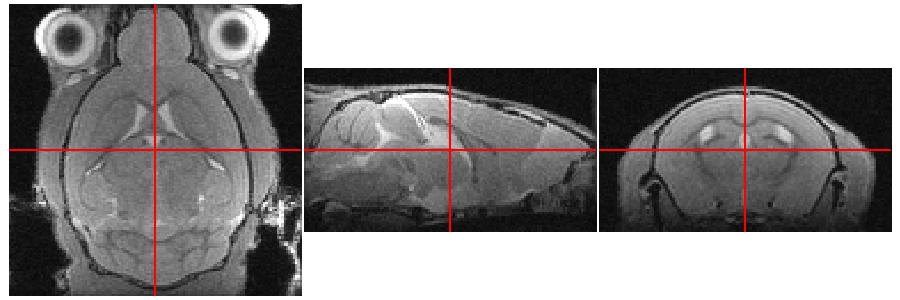

In [7]:
ns.three_plane('assets/example-4_ses-1_acq.nii.gz', interactive=True, clim=(0,3))

Session 2:

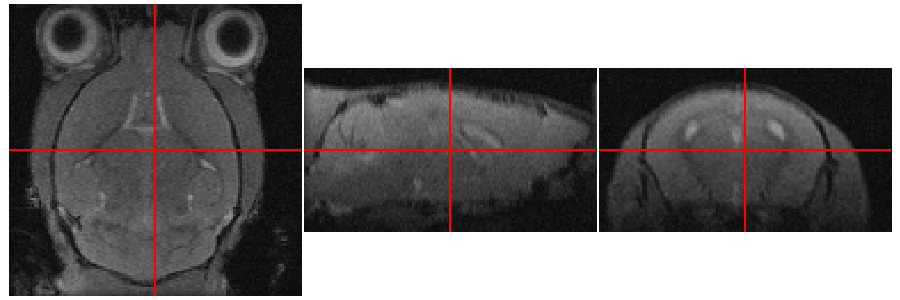

In [8]:
ns.three_plane('assets/example-4_ses-2_acq.nii.gz', interactive=True, clim=(0,3))

Session 3:

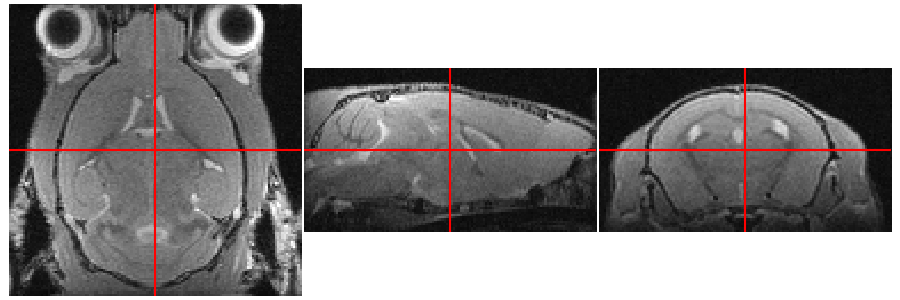

In [9]:
ns.three_plane('assets/example-4_ses-3_acq.nii.gz', interactive=True, clim=(0,3))

```{admonition} Which image has the worst quality? What do you think the problem was?
:class: dropdown
The body temperature of the subject was not as well controlled (>1 ºC) in the second session compared to the first and third sessions.
The change in environmental temperature is enough to change the magnetic field, causing it to drift.

Physiology and environmental factors are important for all scanning sessions, not just functional scanning.
```

## Example 5
Finally, here is a subject whose 4D BOLD images from a single session have been assessed with `MRIQC`:

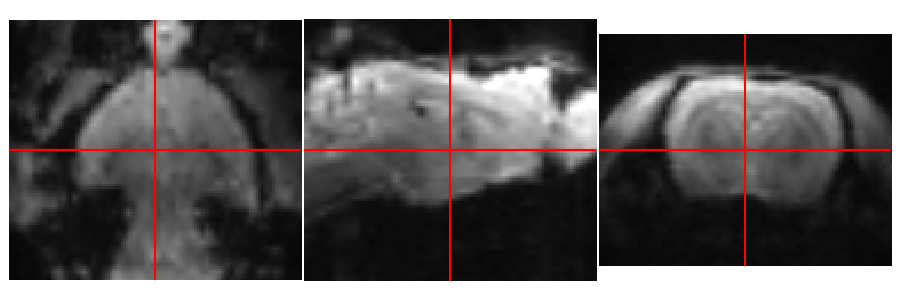

In [10]:
ns.three_plane('assets/example-5_run-01_acq.nii.gz', interactive=True, clim=(0,75))

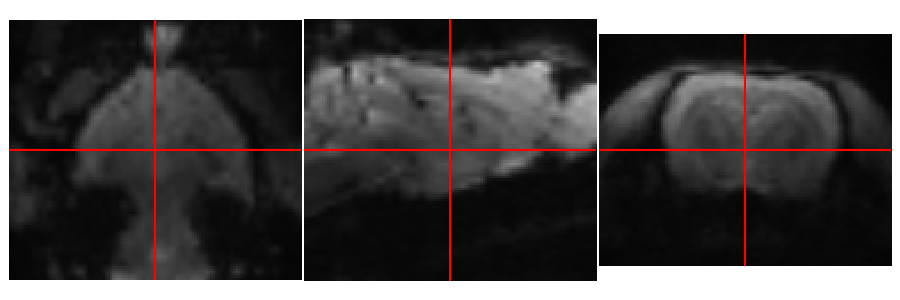

In [11]:
ns.three_plane('assets/example-5_run-02_acq.nii.gz', interactive=True, clim=(0,75))

The `MRIQC` reports for {download}`run 1<./assets/example-5_run-01_acq.html>` and {download}`run 2<./assets/example-5_run-02_acq.html>` are also available.

Which run is better? Can you spot the problem?
```{hint}
:class: dropdown
Try comparing the *carpet plots*, generated by `MRIQC`, which facilitate viewing patterns across all voxels over time.
run 1:
![run 1](./assets/example-5_run-01_desc-fmriplot_acq.svg)

run 2:
![run 2](./assets/example-5_run-02_desc-fmriplot_acq.svg)
```

```{admonition} What do you think the problem was?
:class: dropdown
The animal moved in the last part of the scan, removing their head entirely from the cradle and head coil.

Interestingly, this is not obvious in the mean image, which is justification to check the whole time course and not just some volumes!
```

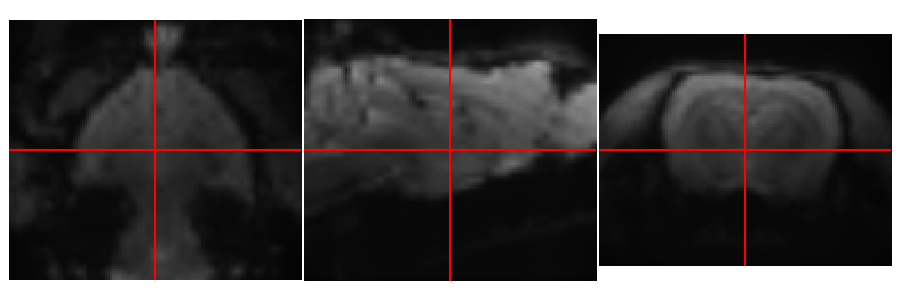

In [12]:
ns.three_plane('./assets/example-5_run-02_desc-tmean_acq.nii.gz', interactive=True, clim=(0,75))